In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

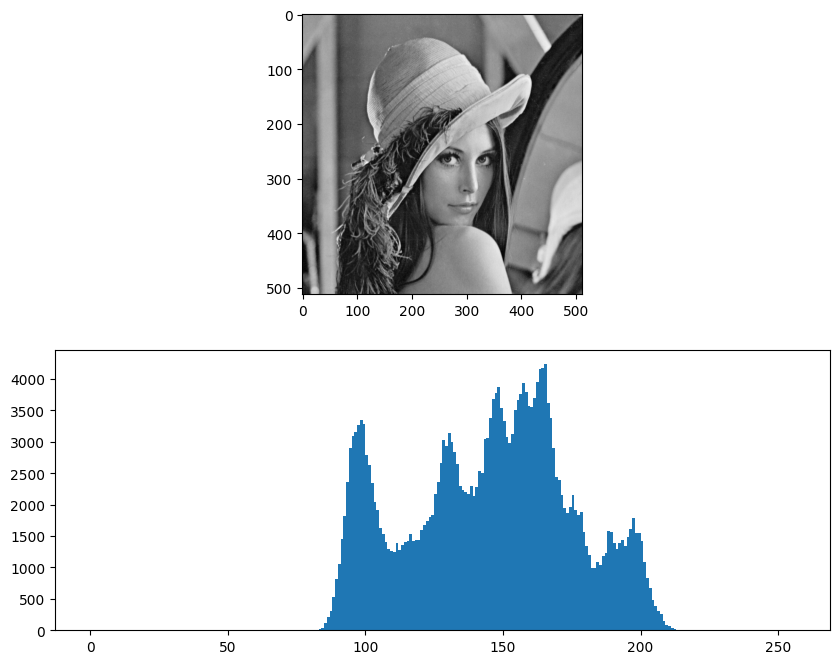

In [3]:
# Построение и визуализация гистограммы

image1 = cv.imread('../images/lenna_bad.png')
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
range_arr = [0, 256]

hist1 = cv.calcHist([gray_image1], channels, None, histSize, range_arr)

gs = plt.GridSpec(2,1)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.hist(gray_image1.reshape(-1), 256, range_arr)
plt.show()

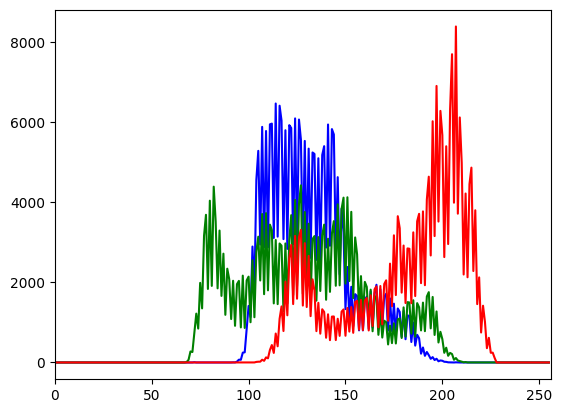

In [4]:
def plot_rgb_hist(image, histSize, range_arr):
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, range_arr)
        plt.plot(hist, color=col)
        plt.xlim(range_arr)


plot_rgb_hist(image1, histSize, range_arr)
plt.show()

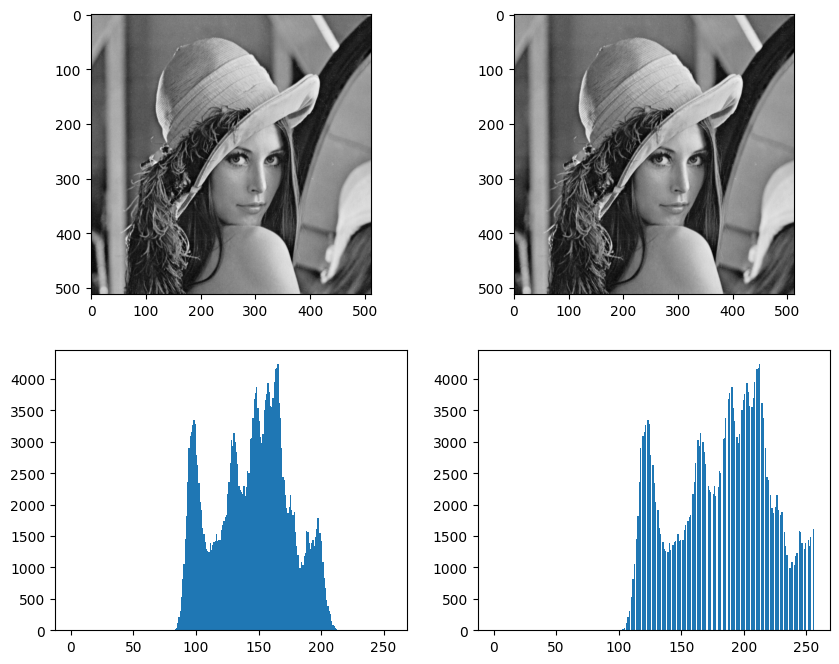

In [6]:
# gamma correction
gamma = 1.05
lut = lambda i: i ** gamma
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, [0,256])
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, [0,256])
plt.show()

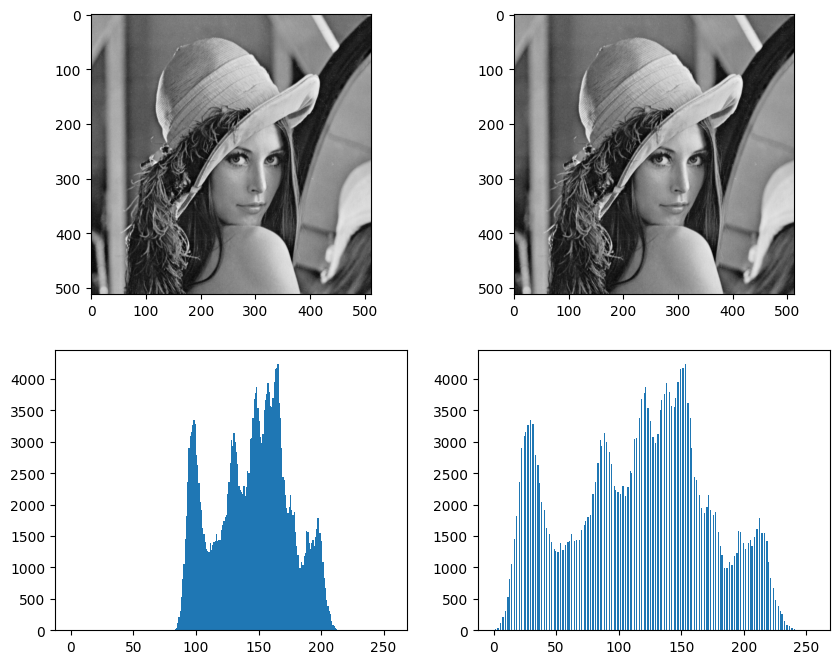

In [ ]:
# Адаптивная яркостная нормализация 
lut = lambda i: 255 * ((i - np.min(i)) / (np.max(i) - np.min(i)))
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range_arr)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range_arr)
plt.show()


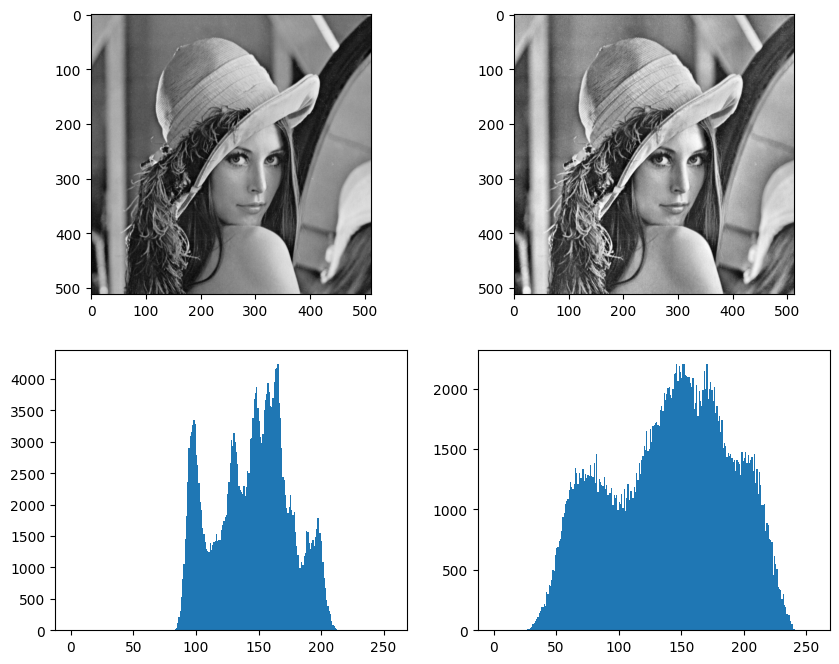

In [ ]:
# Standart CV func
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(equalized, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range_arr)
plt.subplot(gs[3])
plt.hist(equalized.reshape(-1), 256, range_arr)
plt.show()